In [420]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats as st
plt.style.use('default')

##  Standard cluster : NGC104

In [421]:
BV,mV = np.loadtxt('Data/ngc104.dat',unpack=True)

Text(0.5, 1.0, 'NGC 104')

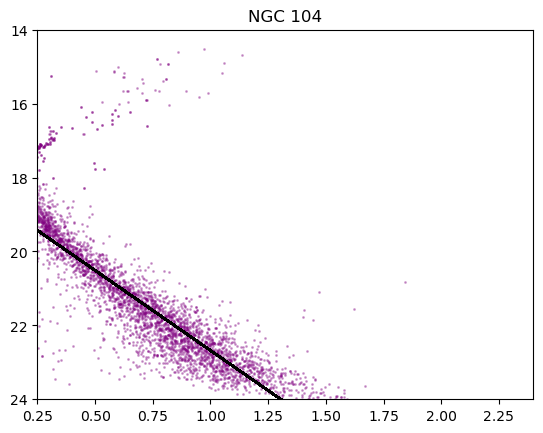

In [422]:
plt.scatter(BV,mV,s=1.2,c="purple",alpha=0.3)
plt.plot(BV, m*BV + c,"k")
plt.axis([0.25,2.4,24,14])
plt.title("NGC 104")

In [312]:
x1 = np.argwhere(BV>1.25)
BV = np.delete(BV,x1)
mV = np.delete(mV,x1)

x2 = np.argwhere(BV<0.25)
BV = np.delete(BV,x2)
mV = np.delete(mV,x2)

y2 = np.argwhere(mV>24)
BV = np.delete(BV,y2)
mV = np.delete(mV,y2)

y1 = np.argwhere(mV<18)
BV = np.delete(BV,y1)
mV = np.delete(mV,y1)

In [298]:
m, c = np.polyfit(BV,mV, 1)
print(m, c)

4.331707451509989 18.348343308072117


In [503]:
c

18.348343308072117

In [316]:
m*BV + c

array([21.3112312 , 21.8310361 , 21.70108488, ..., 19.53523115,
       20.30194337, 19.73015799])

In [317]:
np.savetxt('Data/CMD-fit-NGC104.dat',np.c_[BV,m*BV + c]) 

In [485]:
Bv,mv = np.loadtxt('Data/ngc104.dat',unpack=True)

In [486]:
Bv_fit,mv_fit = np.loadtxt('Data/CMD-fit-NGC104.dat',unpack=True)

Text(0.5, 1.0, 'NGC 104')

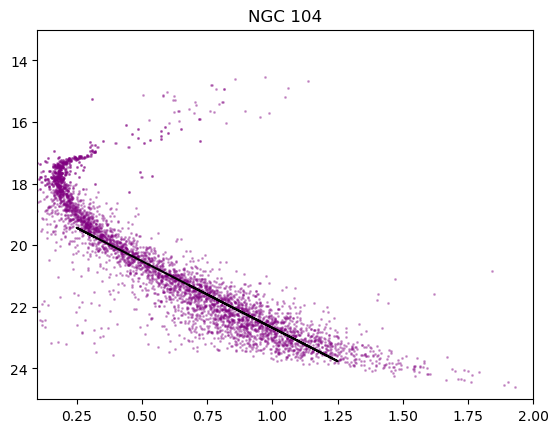

In [487]:
# Fitting a line to the standard cluster

plt.scatter(Bv,mv,s=1.2,c="purple",alpha=0.3)
plt.plot(Bv_fit,mv_fit,"k")
plt.axis([0.10,2.0,25,13])
plt.title("NGC 104")

In [488]:
# calculating the distance modulus to convert everything into Absolute magnitudes 

mu = 13.94
Mv = mv - mu
Mv_fit = mv_fit - mu

Text(0.5, 1.0, 'NGC 104 standard')

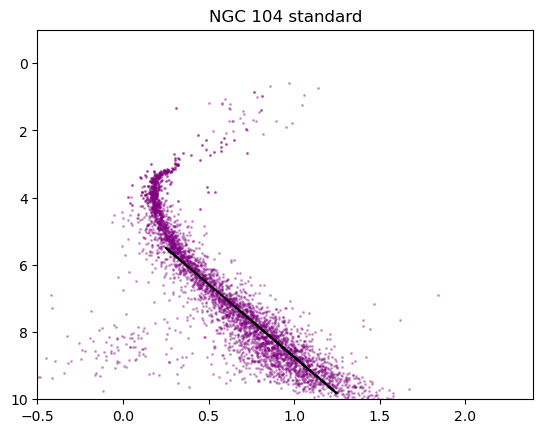

In [489]:
#plotting the absolute magnitude CMD

plt.scatter(Bv,Mv,s=1.2,c="purple",alpha=0.3)
plt.plot(Bv_fit,Mv_fit,"k")
plt.axis([-0.5,2.4,10,-1])
plt.title("NGC 104 standard")

## Distance to a given Cluster

In [524]:
cluster_name = "ngc3201"

In [525]:
file_name = "Data/"+cluster_name+".dat"

In [545]:
Color,App = np.loadtxt(file_name,unpack = True)

In [546]:
def convert_to_m(M,d):
    m = M - 5 + 5 * np.log10(d)
    return m

In [548]:
def distance(BV_value):
    
    i1 = find_nearest(Bv_fit,BV_value)
    i2 = find_nearest(App,BV_value)
    
    mu = App[i2] - Mv_fit[i1]
    d = np.power(10, (mu+5)/5)
    return d

In [567]:
plt.style.use('default')
plt.rc('font', family='serif')
plt.rc('xtick', labelsize='x-small')
plt.rc('ytick', labelsize='x-small')
plt.rcParams['font.size'] = 30

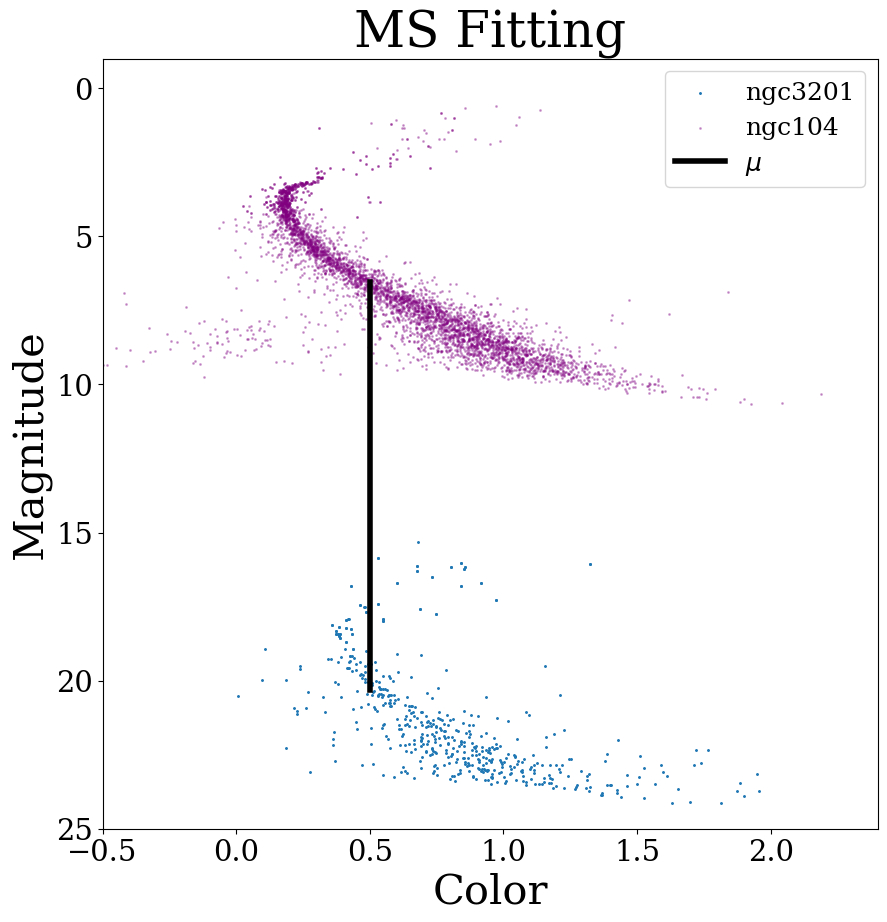

In [604]:
#plt.plot(Bv_fit,Mv_fit,c="red",label="Standard CMD fit")
plt.figure(figsize=(10,10))
plt.scatter(Color,App,s=1.2, label= cluster_name)
plt.scatter(Bv,Mv,s=1.2,c="purple",alpha=0.3, label="ngc104")
plt.axis([-0.5,2.4,25,-1])
plt.title("MS Fitting")
plt.xlabel("Color")
plt.ylabel("Magnitude")
plt.axvline(x=0.5, ymin=0.18, ymax=0.71,linewidth=4, color='k',label='$\mu$')
plt.legend(loc=1, prop={'size': 18})
plt.savefig("Figures/Fitting-Example.pdf")

In [550]:
D = []

for BVs in Bv_fit:
    D.append(distance(BVs))

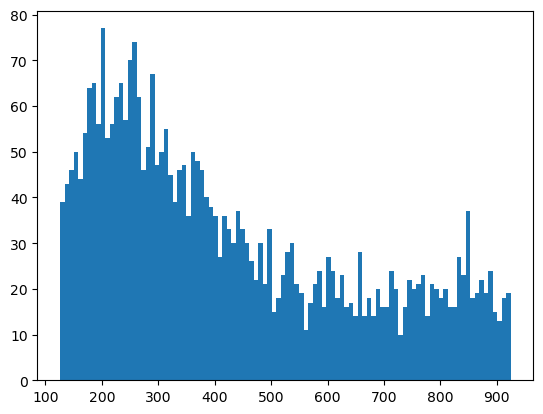

In [551]:
n, bins, patches = plt.hist(D,100)

In [552]:
np.mean(D)

427.3105851756061

In [555]:
mode_index = n.argmax()
distance = (bins[mode_index] + bins[mode_index+1])/2

In [556]:
print('the mode:'+ str((bins[mode_index] + bins[mode_index+1])/2))

the mode:201.7573239684225


In [557]:
mV_fit=convert_to_m(Mv_fit,(bins[mode_index] + bins[mode_index+1])/2)

In [558]:
mV_fit

array([13.89537775, 14.41518264, 14.28523142, ..., 12.11937769,
       12.88608991, 12.31430453])

Text(0.5, 1.0, 'd = ')

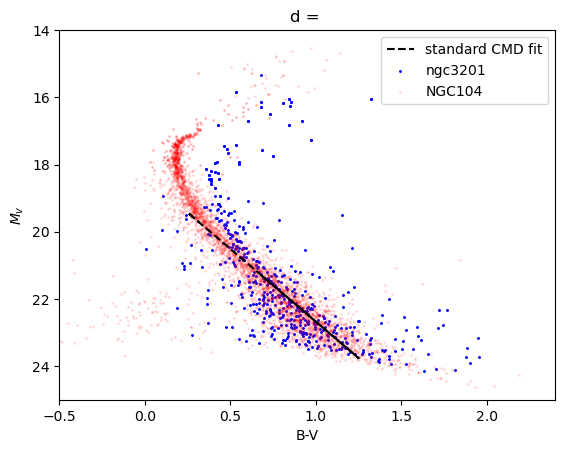

In [559]:
plt.plot(Bv_fit,mv_fit,"k--",label="standard CMD fit")
plt.scatter(Color,App,s=1.2,c="blue",label= cluster_name)
plt.scatter(BV,mV,s=1.2,c="red",alpha=0.1,label="NGC104")
#plt.plot(Bv_fit,S_mV_fit,"k-")
plt.axis([-0.5,2.4,25,14])
plt.xlabel("B-V")
plt.ylabel("$M_{v}$")
plt.legend()
plt.title("d = ")

In [560]:
Bv_fit

array([0.684, 0.804, 0.774, ..., 0.274, 0.451, 0.319])

In [544]:
mv_fit

array([21.3112312 , 21.8310361 , 21.70108488, ..., 19.53523115,
       20.30194337, 19.73015799])

In [ ]:
err = []

for BVs in Bv_fit:
    
    i1 = find_nearest(Bv_fit,BVs)
    i2 = find_nearest(BV1,Color)
    
    mu = mV1[i2] - Mv_fit[i1]
    d = np.power(10, (mu+5)/5)
    return d
    err = 
    D.append(distance(BVs))